In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [3]:
# Load data
df = pd.read_csv('/content/Electric_Vehicle_Population_By_County.csv')

In [4]:
# Clean and preprocess
for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)',
            'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
    df[col] = df[col].str.replace(',', '').astype(int)
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['County', 'State'])

In [5]:
# Group by date and sum EV totals
monthly_ev = df.groupby('Date')['Electric Vehicle (EV) Total'].sum().reset_index()

In [6]:
# Prepare data for Prophet
df_prophet = monthly_ev.rename(columns={'Date': 'ds', 'Electric Vehicle (EV) Total': 'y'})

In [7]:
# Model and forecast
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qdsj3kd/u4hutda5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9qdsj3kd/tpxijzcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43144', 'data', 'file=/tmp/tmp9qdsj3kd/u4hutda5.json', 'init=/tmp/tmp9qdsj3kd/tpxijzcd.json', 'output', 'file=/tmp/tmp9qdsj3kd/prophet_modelb3kq8a7a/prophet_model-20250724061122.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:11:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:11:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

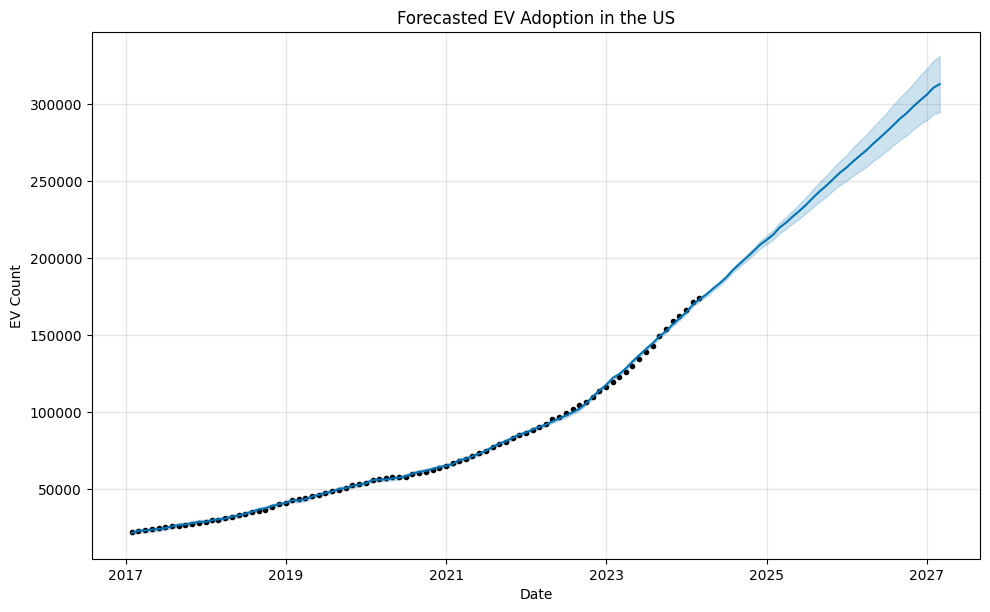

In [8]:
# Plot forecast
model.plot(forecast)
plt.title("Forecasted EV Adoption in the US")
plt.xlabel("Date")
plt.ylabel("EV Count")
plt.grid(True)
plt.show()

In [9]:
# Estimate charging demand
forecast['charging_sessions'] = forecast['yhat'] * 1.5
forecast[['ds', 'yhat', 'charging_sessions']].tail(12)

,ds,yhat,charging_sessions
110,2026-03-31,269850.171291,404775.256937
111,2026-04-30,274012.854953,411019.282430
112,2026-05-31,277927.237430,416890.856145
113,2026-06-30,281848.183361,422772.275041
114,2026-07-31,286005.180993,429007.771489
115,2026-08-31,290399.114943,435598.672414
116,2026-09-30,293868.395791,440802.593686
117,2026-10-31,298282.244020,447423.366030
118,2026-11-30,302158.465616,453237.698424
119,2026-12-31,305881.159928,458821.739892
